# Undersampling e Oversampling

Desbalanceamento de dados é um problema muito comum nos conjuntos de dados. Duas possíveis soluções são a subamostragem (undersampling) aleatória e a superamostragem (oversampling) aleatória. O exemplo a seguir mostra um exemplo simples de como isso pode ser feito utilizando a biblioteca Pandas.

---

## Exploração inicial dos dados:

Criando conjunto de dados artificial, desbalanceado:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f872fa650>,
      dtype=object)

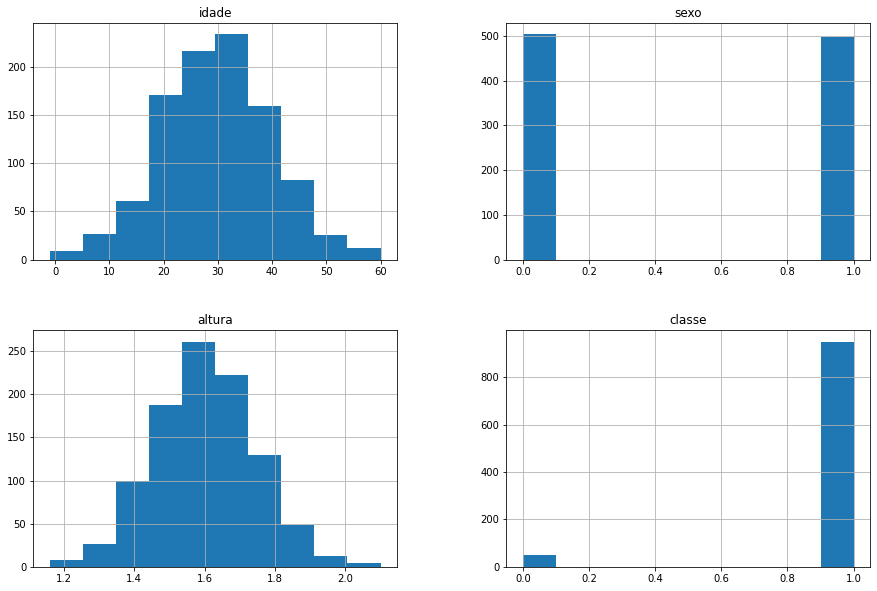

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Dados de exemplo
dados = pd.DataFrame({
    'idade': np.round(np.random.normal(loc=30, scale=10, size=1000)),
    'sexo': np.random.choice([0, 1], 1000), # 0 homem, 1 mulher
    'altura': np.round(np.random.normal(loc=1.6, scale=.15, size=1000), 2),
    'classe':  np.random.choice([0, 1], 1000, p=[0.05, 0.95])
    })

plt.rcParams['figure.figsize'] = [15, 10]
dados.hist()

Nota-se um grande desbalanceamento das classes através do histograma da variável alvo `classe`

In [ ]:
dados['classe'].value_counts()

1    933
0     67
Name: classe, dtype: int64

A função `value_counts()` confirma o desbalanceamento: há **955** ocorrências da classe 1 e apenas **45** da classe 0.

---

## Superamostragem - Oversampling

Na superamostragem vamos aumentar o número de elementos da classe menos representada.

Primeiro vamos separar as tuplas do nosso conjunto de dados em que a classe é igual à 0:

In [ ]:
classe_0 = dados[dados.classe == 0]
classe_0

,idade,sexo,altura,classe
6,31.0,1,1.49,0
77,36.0,0,1.54,0
98,46.0,1,1.46,0
101,24.0,1,1.76,0
105,31.0,1,1.42,0
...,...,...,...,...
974,23.0,0,1.67,0
982,29.0,1,1.56,0
983,33.0,0,1.45,0
992,17.0,0,1.62,0


In [ ]:
classe_0.shape

(67, 4)

Agora vamos obter uma amostra de tamanho **955**, para que as classes fiquem igualmente distribuídas. Note que `replace` deve ser true, pois sem repetições não conseguiriamos criar uma amostra da classe `0` maior que **45**:

In [ ]:
sample_0 = classe_0.sample(n=955, replace=True)
sample_0

,idade,sexo,altura,classe
876,19.0,0,1.53,0
974,23.0,0,1.67,0
927,40.0,1,1.95,0
577,26.0,0,1.53,0
983,33.0,0,1.45,0
...,...,...,...,...
105,31.0,1,1.42,0
356,37.0,1,1.55,0
300,21.0,1,1.74,0
480,30.0,1,1.61,0


Agora vamos concatenar os dados da nossa amostra com os dados do conjunto original que possuiam classe igual à 1:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f973d6b90>,
      dtype=object)

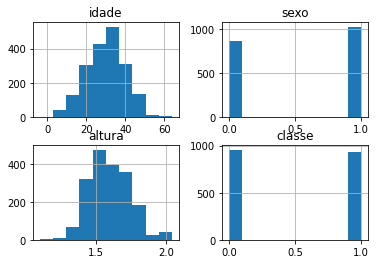

In [ ]:
classe_1 = dados[dados.classe == 1]
dados_upsampled = pd.concat([sample_0, classe_1])
dados_upsampled.hist()

Checando a distribuição das classes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f9d902610>]],
      dtype=object)

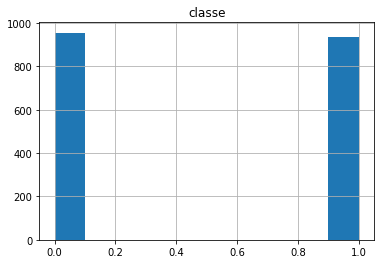

In [ ]:
dados_upsampled.hist('classe')

In [ ]:
dados_upsampled['classe'].value_counts()

0    955
1    933
Name: classe, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f97139bd0>,
      dtype=object)

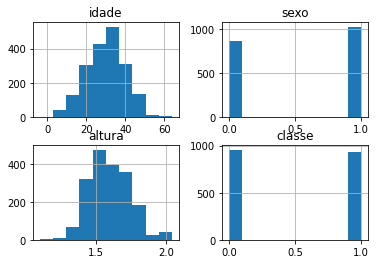

In [ ]:
dados_upsampled.hist()



---

## Subamostragem - Undersampling

Para a subamostragem, vamos diminuir o tamanho da classe predominante.

Checando a distribuição das classes nos dados originais:

In [ ]:
dados['classe'].value_counts()

1    933
0     67
Name: classe, dtype: int64

Selecionando as tuplas em que a classe é igual à 1:

In [ ]:
classe_1 = dados[dados.classe == 1]
classe_1

,idade,sexo,altura,classe
0,40.0,1,1.48,1
1,38.0,1,1.71,1
2,36.0,0,1.52,1
3,34.0,1,1.41,1
4,30.0,1,1.80,1
...,...,...,...,...
995,41.0,1,1.49,1
996,21.0,0,1.21,1
997,24.0,0,1.53,1
998,36.0,0,1.59,1


Obtendo uma amostra de tamanho **45**. Note que, nesse caso, é interessante que nossa amostra possua elementos distintos, por isso `replace=False`:

In [ ]:
sample_1 = classe_1.sample(n=45, replace=False)
sample_1

,idade,sexo,altura,classe
617,17.0,1,1.70,1
265,11.0,0,1.62,1
784,40.0,1,1.52,1
507,39.0,1,1.69,1
956,35.0,0,1.58,1
552,41.0,1,1.52,1
864,32.0,1,1.53,1
257,39.0,0,1.83,1
949,32.0,0,1.55,1
688,30.0,1,1.77,1


In [ ]:
sample_1.shape

(45, 4)

Agora iremos concatenar a amostra com dados com os dados do conjunto original que possuiam classe igual a `0`:

In [ ]:
classe_0 = dados[dados.classe == 0]
dados_downsampled = pd.concat([classe_0, sample_1])

Verificando a distribuição das classes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f9e034d50>]],
      dtype=object)

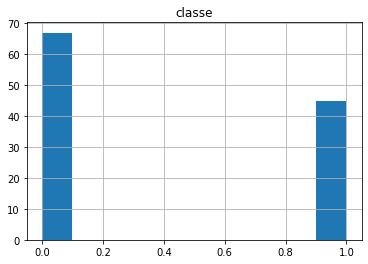

In [ ]:
dados_downsampled.hist('classe')

In [ ]:
dados_downsampled['classe'].value_counts()

0    67
1    45
Name: classe, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f96ef9c10>,
      dtype=object)

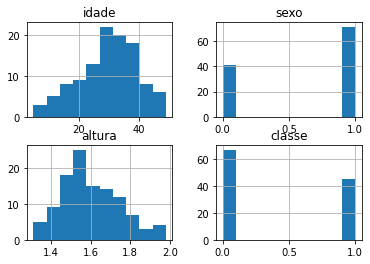

In [ ]:
dados_downsampled.hist()

### Fazendo sampling dos exemplos e da classe quando estão em objetos diferentes

In [ ]:
indices_0 = np.where(dados.classe == 0)[0]
atributos = dados[['altura','sexo', 'idade']].to_numpy()
classes = dados['classe'].to_numpy()

indices_0_sample = np.random.choice(indices_0, size=10, replace=False)



---

## Métricas de desempenho em conjuntos desbalanceados

Alguns cuidados são necessários ao medir desempenho em dados não balanceados. Por exemplo, suponha um classificador binário (`Some_classifier`) que sempre classifica uma entrada como a classe predominante do conjunto. Vamos calcular sua acurácia no conjunto de dados inicial:

In [ ]:
import numpy as np

# Criando uma classe de classificador de exemplo
class Some_classifier:
  def __init__(self):
    self.predict_value = None
  def fit(self, X, y):
    self.predict_value = y.mode()
  def predict(self, X):
    return np.repeat(1, X.shape[0])

Separando em variáveis de entrada (`X`) e variáveis alvo (`y`) e calculando acurácia padrão:

In [ ]:
from sklearn.metrics import accuracy_score

# Separando o conjunto de dados
X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

my_classifier = Some_classifier()
my_classifier.fit(X, y)
y_pred = my_classifier.predict(X)

print("Acurácia do classificador: %.2f%%" % (accuracy_score(y, y_pred)*100))

Acurácia do classificador: 93.30%


A medida de acurácia não representa muito bem o desempenho do nosso classificador.

Material que discute bem diferentes métricas para dados desbalanceados: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

### Importante: Técnicas de amostragem devem ser feitas no conjunto de treinamento!